In [ ]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
library_data = pd.read_csv('University_Library_Data.csv', index_col='№')
library_data

,Book ID,Book Name,Genre,ID,Status,Cautions,Degree,Faculty,Age,Gender,Date
№,,,,,,,,,,,
1,1030,The Time Machine,Fantasy & Science Fiction,200000328,returned,3,bachelor,Engineering faculty,19,Female,2020-01-01
2,1023,The Lord of the Rings,Fantasy & Science Fiction,200000772,returned,1,bachelor,Engineering faculty,20,Female,2020-01-01
3,1017,The Old Man and the Sea,Fiction,200000682,returned,1,bachelor,Engineering faculty,19,Female,2020-01-01
4,1057,"Thinking, Fast and Slow",Non-Fiction,200000648,returned,3,bachelor,Engineering faculty,19,Male,2020-01-01
5,1021,The Hobbit,Fantasy & Science Fiction,200000576,returned,3,bachelor,Engineering faculty,21,Female,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...
3996,1053,The Power of Habit,Non-Fiction,230000481,given,3,teacher,Business school,46,Female,2020-11-26
3997,1040,Cloud Atlas,Fantasy & Science Fiction,230000290,returned,3,teacher,Business school,57,Female,2020-11-26
3998,1098,Goodnight Moon,Children’s Books,230001165,given,1,teacher,Business school,55,Female,2020-11-26


<Axes: title={'center': 'Number of Records Per Month'}, xlabel='Date', ylabel='Number of Records'>

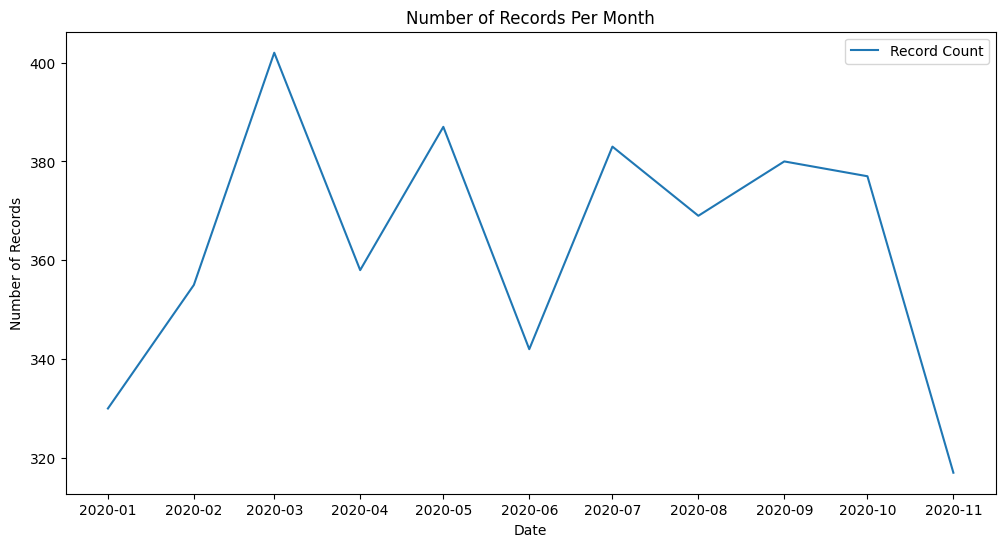

In [ ]:
library_data['Date'] = pd.to_datetime(library_data['Date'])

library_data['Month'] = library_data['Date'].dt.to_period('M')  # 'M' gives year and month

# Group by Month
monthly_counts = library_data.groupby('Month').size().reset_index(name='Record Count')
monthly_counts = monthly_counts.set_index('Month')
monthly_counts.index = monthly_counts.index.to_timestamp()
plt.figure(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.title('Number of Records Per Month')
sns.lineplot(data=monthly_counts)


This **bar chart** shows how many interactions were made with library in each month
> As you can see **the most number** of interactions are **in March**

> And **the least** are **in November**

<Axes: title={'center': 'Number of Readers Per Book'}, xlabel='Number of Readers', ylabel='Book Name'>

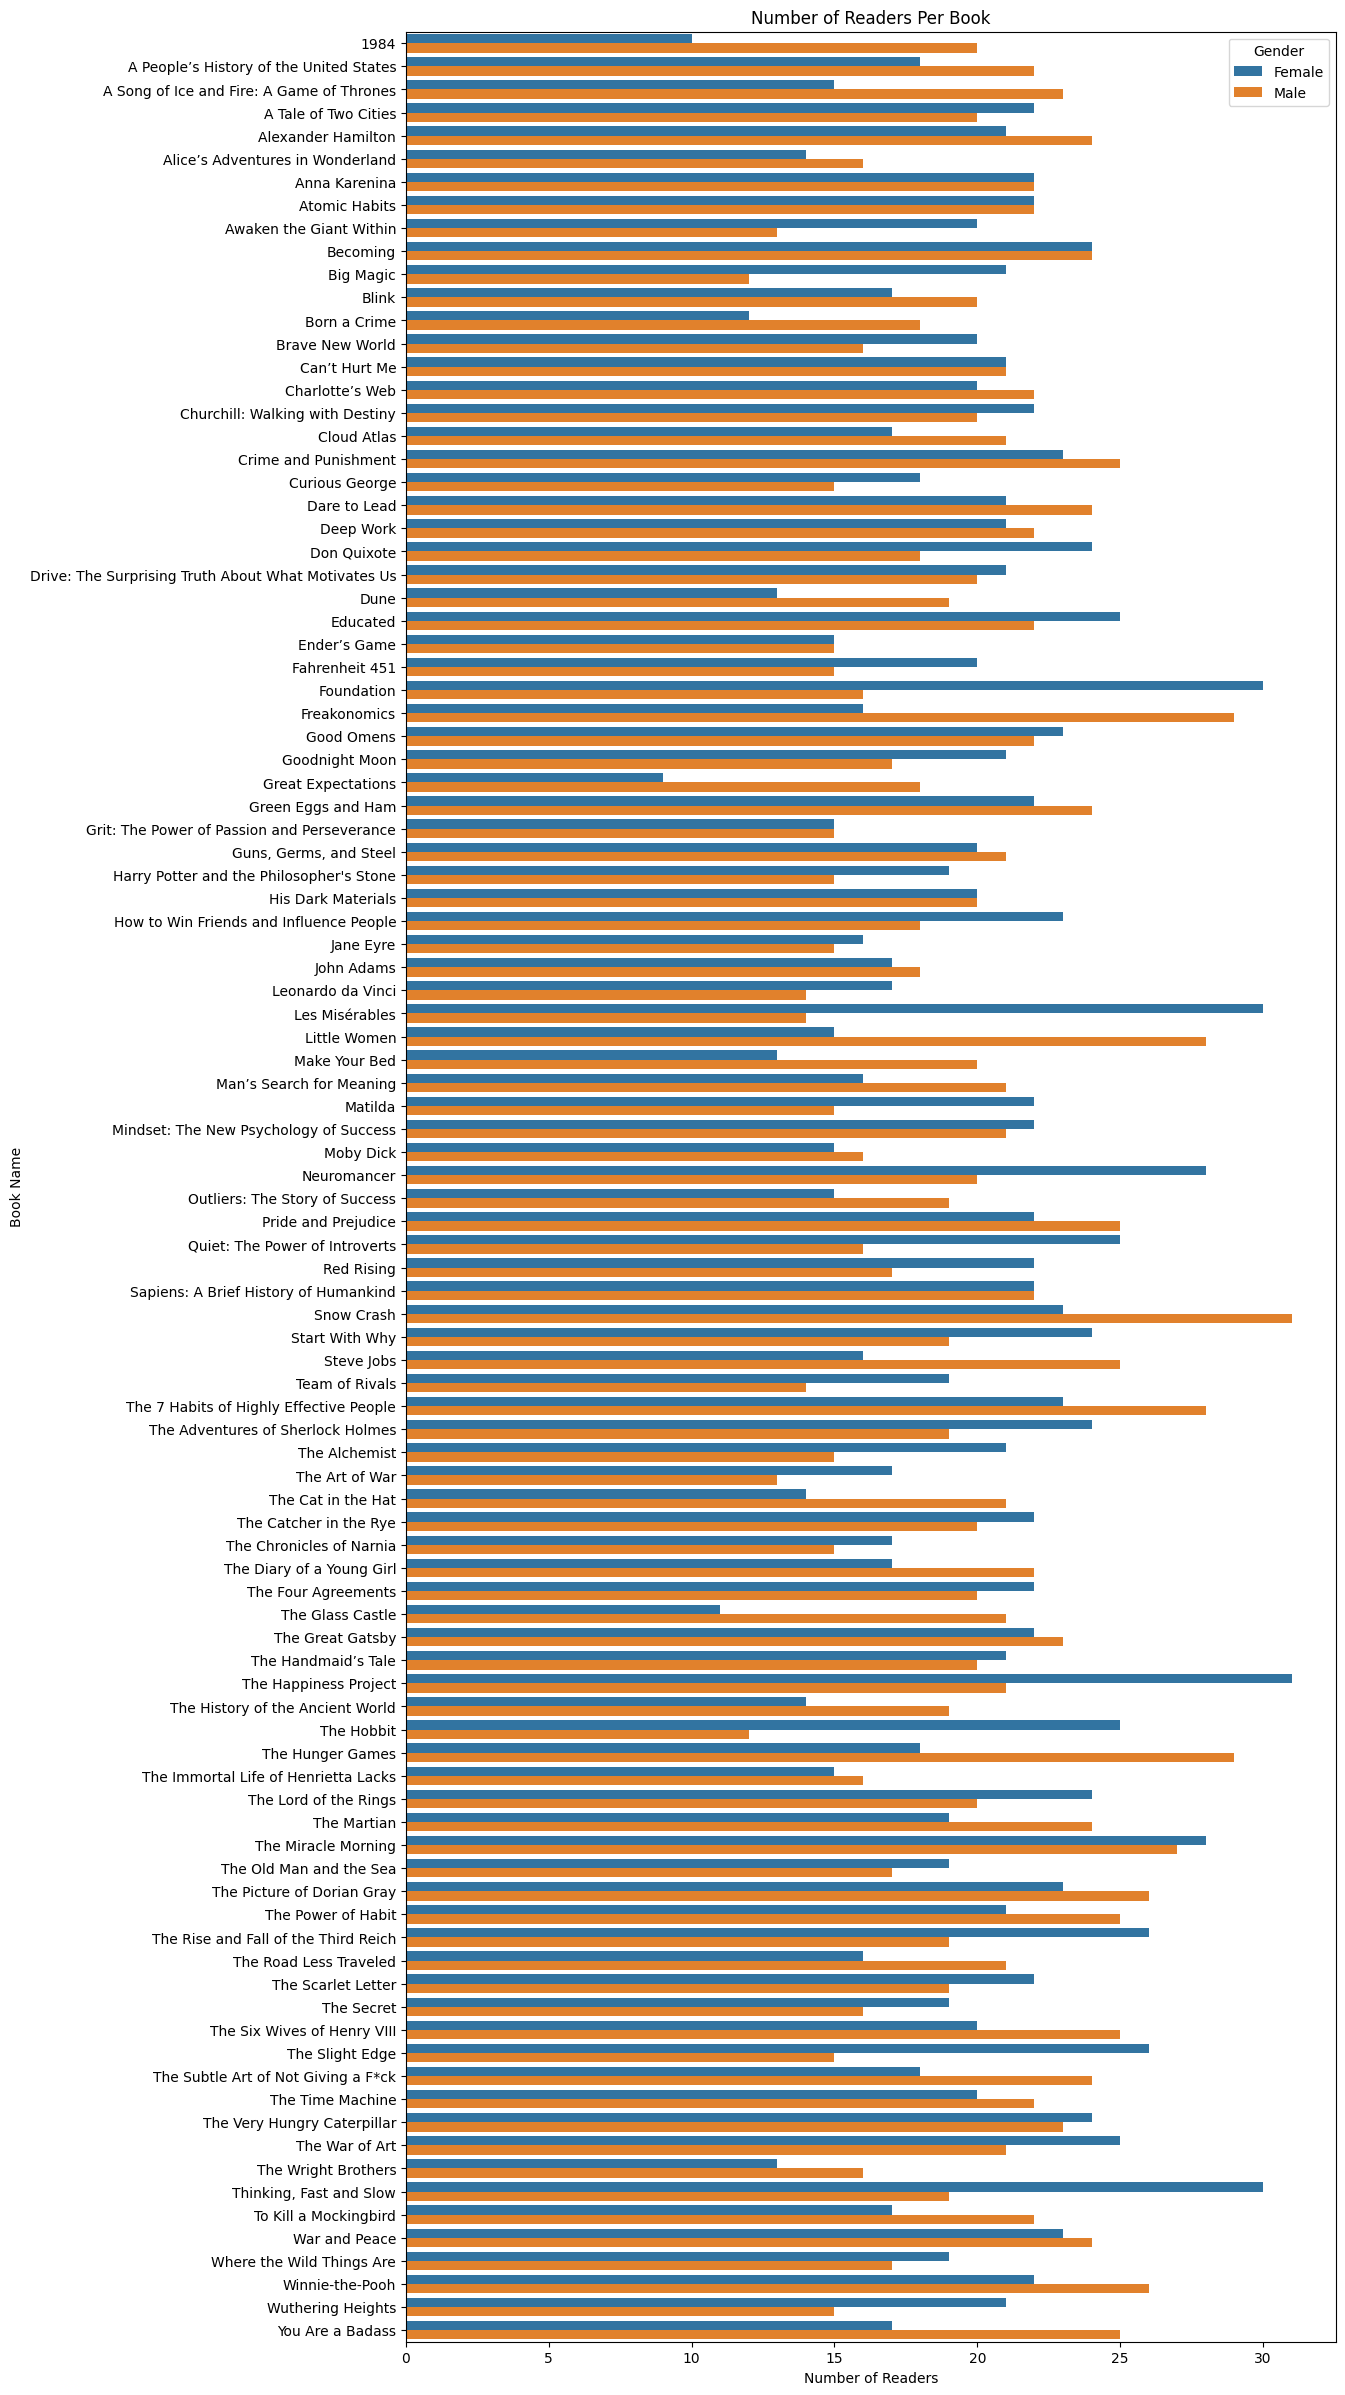

In [ ]:
library_data_grouped = library_data.groupby(["Book Name", "Gender"]).agg(
    User_Count=("Book Name", "count")
).reset_index()
plt.figure(figsize=(12, 30))
plt.xlabel('Number of Readers')
plt.ylabel('Book Name')
plt.title('Number of Readers Per Book')
sns.barplot(data=library_data_grouped, x='User_Count', y='Book Name', hue='Gender')



<Axes: title={'center': 'Number of Readers Per Genre'}, xlabel='Number of Readers', ylabel='Genre'>

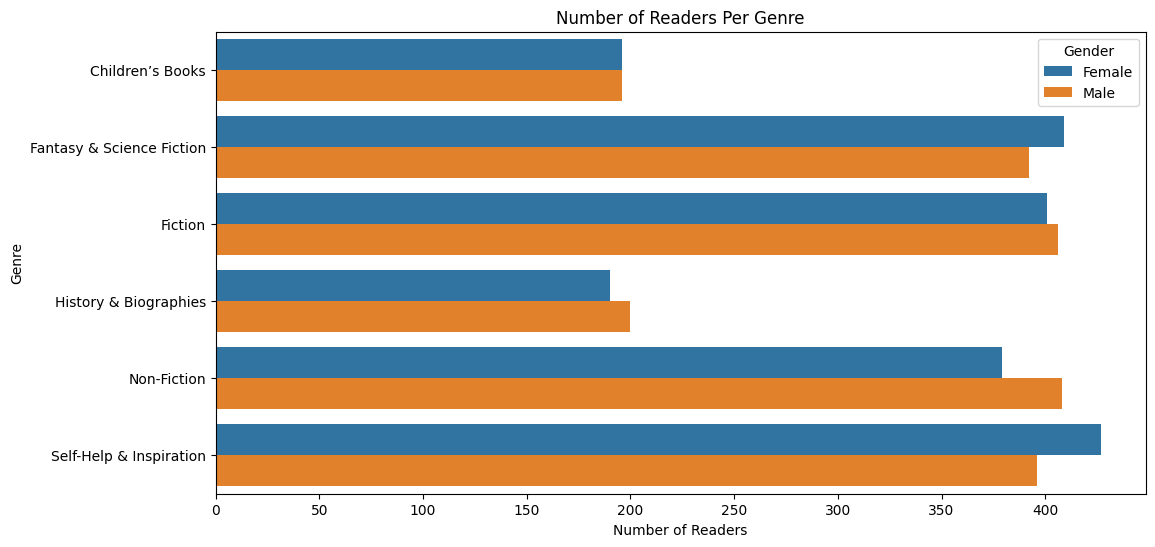

In [ ]:
library_data_grouped = library_data.groupby(["Genre", "Gender"]).agg(
    User_Count=("Genre", "count")
).reset_index()
library_data_grouped
# sns.scatterplot(x=library_data_grouped['Book_Count'], hue=library_data_grouped['Gender'])
plt.figure(figsize=(12, 6))
plt.xlabel('Number of Readers')
plt.ylabel('Genre')
plt.title('Number of Readers Per Genre')
sns.barplot(data=library_data_grouped, x='User_Count', y='Genre', hue='Gender')

<Axes: title={'center': 'Number of Readers Per Genre'}, xlabel='Number of Readers', ylabel='Genre'>

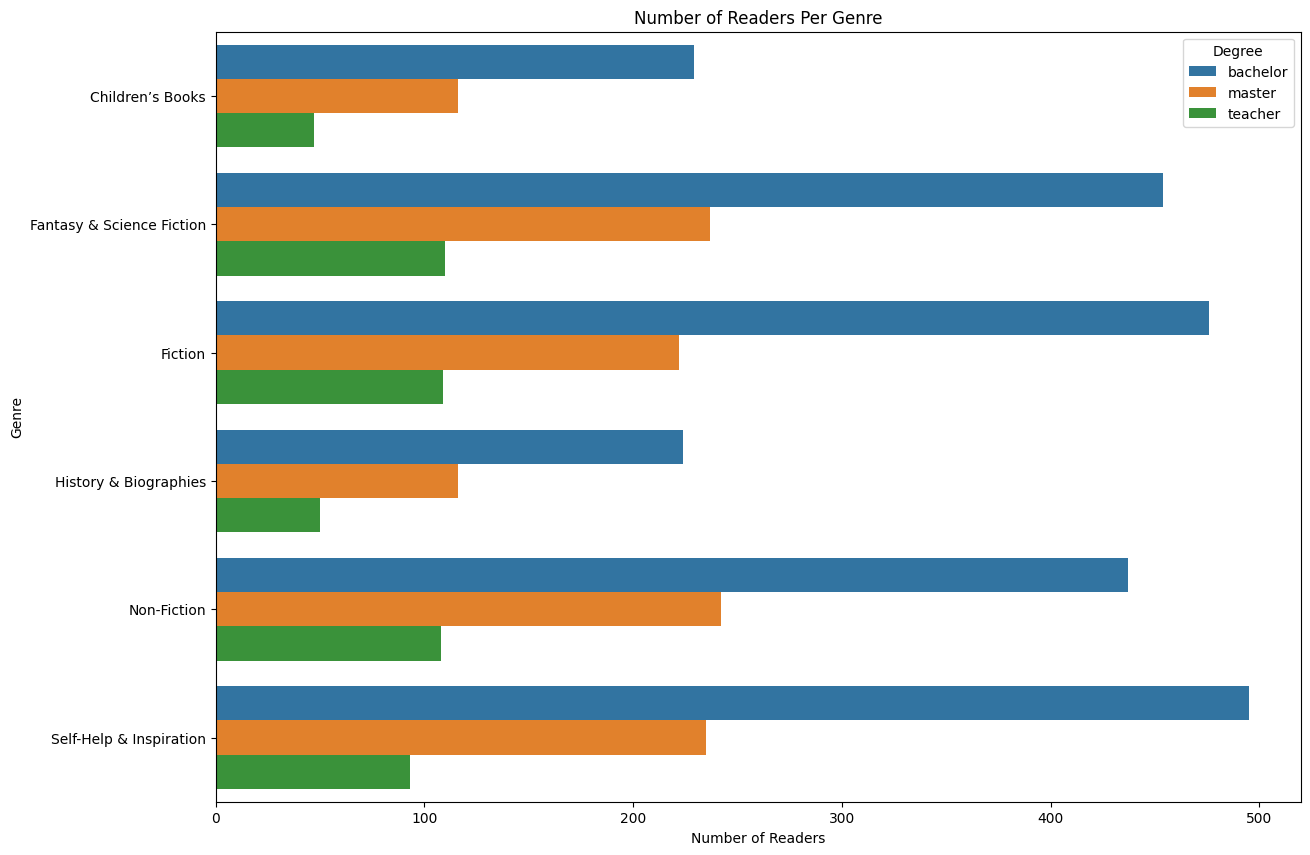

In [ ]:
library_data_grouped = library_data.groupby(["Genre", "Degree"]).agg(
    User_Count=("Genre", "count")
).reset_index()
library_data_grouped
# sns.scatterplot(x=library_data_grouped['Book_Count'], hue=library_data_grouped['Gender'])
plt.figure(figsize=(14, 10))
plt.xlabel('Number of Readers')
plt.ylabel('Genre')
plt.title('Number of Readers Per Genre')
sns.barplot(data=library_data_grouped, x='User_Count', y='Genre', hue='Degree')

In [ ]:
library_data_grouped = library_data.groupby(["Genre", "Degree"]).agg(
    User_Count=("Genre", "count")
).reset_index()
library_data_grouped

new_df = library_data_grouped.pivot(index='Degree', columns='Genre', values='User_Count')
plt.figure(figsize=(14, 10))
plt.ylabel('Degree of User')
plt.xlabel('Genre')
plt.title('Number of Readers Per Genre')
sns.heatmap(data=new_df, annot=True)



NameError: name 'library_data' is not defined

By this heatmap, it's more obvious to understand with what genres different degrees people interact with

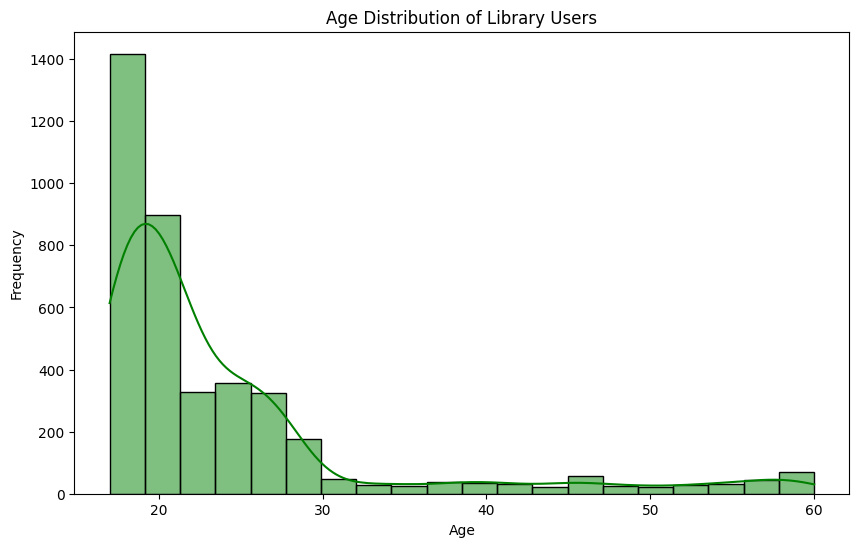

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(library_data['Age'], bins=20, kde=True, color='green')
plt.title('Age Distribution of Library Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

By this historgram age distribution, you can see that younger people tend to interact more with library

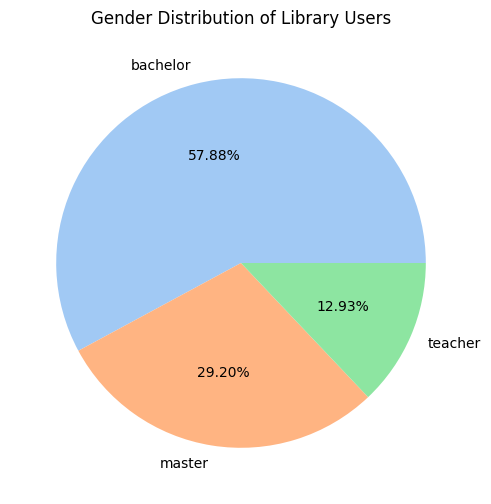

In [ ]:
gender_counts = library_data['Degree'].value_counts()

# Pie chart for gender distribution
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.2f%%', colors=sns.color_palette("pastel"))
plt.title('Gender Distribution of Library Users')
plt.show()

<Axes: title={'center': 'Correlation between Age and Number of Books Borrowed'}, xlabel='Age', ylabel='Books Borrowed'>

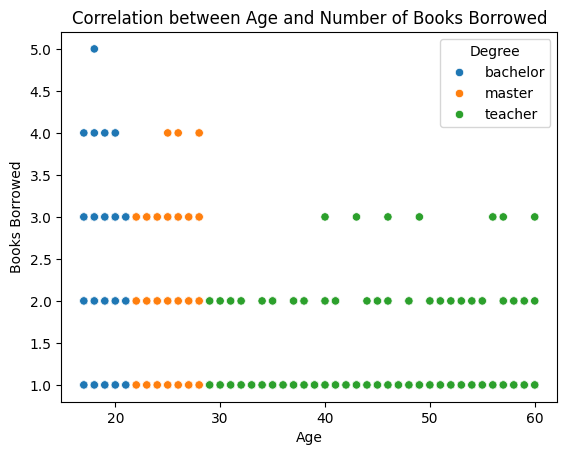

In [ ]:
books_borrowed = library_data.groupby('ID')['Book Name'].count().reset_index(name='Books Borrowed')

df_age_books = library_data[['ID', 'Age', 'Degree']].drop_duplicates()
merged_library_data = pd.merge(df_age_books, books_borrowed, on='ID')

plt.title('Correlation between Age and Number of Books Borrowed')
plt.xlabel('Age')
plt.ylabel('Books Borrowed')

sns.scatterplot(data=merged_library_data, x='Age', y='Books Borrowed', hue='Degree')

<Axes: xlabel='Age', ylabel='Cautions Number'>

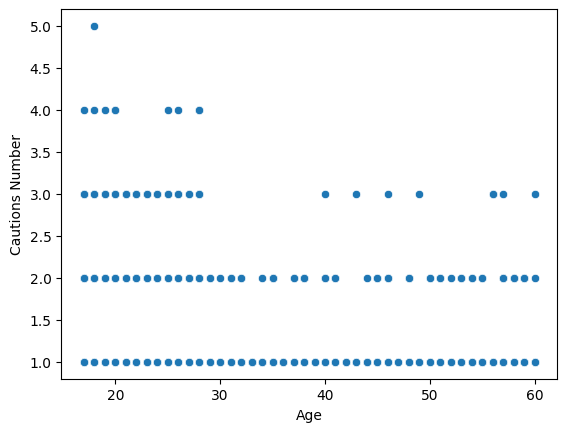

In [ ]:
# cautions = library_data.groupby('ID')['Cautions'].count().reset_index(name='Cautions Number')
# cautions
# other_df = library_data[['ID', 'Age', 'Gender']].drop_duplicates()
# other_library_data = pd.merge(other_df, cautions, on='ID')
# other_library_data
# plt.title('Correlation between Age and Number of Cautions')
# plt.xlabel('Age')
# plt.ylabel('Caution Number')

# sns.scatterplot(x=other_library_data['Age'], y=other_library_data['Cautions Number'])
# sns.scatterplot(data=other_library_data, x='Age', y='Cautions Number', hue='Gender')